In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
evi=pd.read_csv('evi_medio.csv',parse_dates=['system:time_start'])

In [3]:
evi.rename(columns={'system:time_start': 'Date'}, inplace=True)

In [4]:
evi.head()

,Date,EVI
0,2014-01-01,0.031
1,2014-01-02,0.090
2,2014-01-03,0.311
3,2014-01-04,0.265
4,2014-01-05,0.205


In [5]:
evi['date_check'] = evi.Date.diff()
evi.date_check.value_counts()

1 days     1963
2 days        1
10 days       1
Name: date_check, dtype: int64

In [6]:
evi.head()

,Date,EVI,date_check
0,2014-01-01,0.031,NaT
1,2014-01-02,0.090,1 days
2,2014-01-03,0.311,1 days
3,2014-01-04,0.265,1 days
4,2014-01-05,0.205,1 days


In [7]:
mask = (evi['Date'] >= '2018-04-04') & (evi['Date'] <= '2018-12-20')
filtered_df=evi.loc[mask]
print(filtered_df.shape)
filtered_df.date_check.value_counts()

(261, 3)


1 days    261
Name: date_check, dtype: int64

In [8]:
filtered_df.set_index('Date',inplace=True)

In [9]:
LST=pd.read_csv('LST_day.csv',parse_dates=['system:time_start'] ,thousands=r',')
LST_noche=pd.read_csv('LST_noche.csv',parse_dates=['system:time_start'] ,thousands=r',')

In [10]:
LST.rename(columns={'system:time_start': 'Date'}, inplace=True)
LST_noche.rename(columns={'system:time_start': 'Date'}, inplace=True)
LST.head()

,Date,LST_Day_1km
0,2014-01-01,NaN
1,2014-01-02,NaN
2,2014-01-03,NaN
3,2014-01-04,14903.0
4,2014-01-05,15185.0


In [11]:
LST['date_check'] = LST.Date.diff()
LST.date_check.value_counts()

1 days     1965
10 days       1
Name: date_check, dtype: int64

In [12]:
mask = (LST['Date'] >= '2018-04-04') & (LST['Date'] <= '2018-12-20')
filtered_LST=LST.loc[mask]
print(filtered_LST.shape)
LST.set_index('Date',inplace=True)

#filtered_LST.dropna(inplace=True)
mask2 = (LST_noche['Date'] >= '2018-04-04') & (LST_noche['Date'] <= '2018-12-20')
filtered_LST_noche=LST_noche.loc[mask2]
print(filtered_LST_noche.shape)
LST_noche.set_index('Date',inplace=True)

(261, 3)
(261, 2)


In [13]:
filtered_LST.LST_Day_1km=filtered_LST.LST_Day_1km.astype(float)*0.02
filtered_LST.LST_Day_1km= filtered_LST.LST_Day_1km.interpolate(method='spline', order=2)

filtered_LST_noche.LST_Night_1km=filtered_LST_noche.LST_Night_1km.astype(float)*0.02
filtered_LST_noche.LST_Night_1km= filtered_LST_noche.LST_Night_1km.interpolate(method='spline', order=2)

LST_dif=filtered_LST.copy()

/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
LST_dif['noche']=filtered_LST_noche.LST_Night_1km
LST_dif['dif']=LST_dif['LST_Day_1km']-LST_dif['noche']
LST_dif=LST_dif.drop(['LST_Day_1km','date_check','noche'],axis=1)
LST_dif.head()

,Date,dif
1545,2018-04-04,9.540000
1546,2018-04-05,5.840000
1547,2018-04-06,23.798609
1548,2018-04-07,32.275654
1549,2018-04-08,31.237394


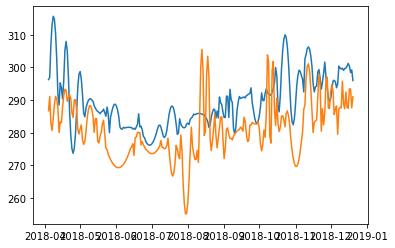

In [15]:
plt.plot(filtered_LST.Date,filtered_LST.LST_Day_1km)
plt.plot(filtered_LST.Date,filtered_LST_noche.LST_Night_1km)

In [16]:
print(LST.isnull().sum())
LST.shape

LST_Day_1km    1002
date_check        1
dtype: int64


(1967, 2)

In [17]:
LAI=pd.read_csv('LAI.csv',parse_dates=['system:time_start'])
LAI.rename(columns={'system:time_start': 'Date'}, inplace=True)
LAI.Lai=LAI.Lai*0.1
mask = (LAI['Date'] >= '2018-04-04') & (LAI['Date'] <= '2018-12-20')
filtered_LAI=LAI.loc[mask]
print(filtered_LAI.shape)
LAI.set_index('Date',inplace=True)
LAI.head()

(65, 2)


,Lai
Date,
2014-01-01,1.0793
2014-01-05,1.1585
2014-01-09,1.0170
2014-01-13,0.9585
2014-01-17,1.0585


In [18]:
merge=pd.merge(filtered_df,LAI, how='left', left_index=True, right_index=True)
merge.head()


merge['Lai'] = merge.Lai.interpolate(method='spline', order=2)
merge['EVI'] = merge.EVI.interpolate(method='spline', order=2)
merge['Lai'].loc[np.isnan(merge['Lai'])]=1.337800

/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
np.isnan(merge.EVI).sum()

0

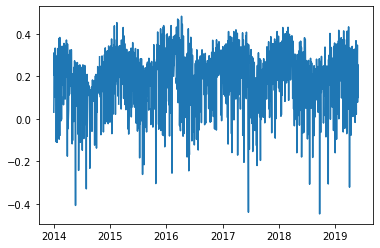

In [20]:
import matplotlib.pyplot as plt

plt.plot(evi.Date,evi.EVI)

In [21]:
mett=pd.read_csv('datos_horario_mean_merge.csv',parse_dates=['fecha'])
mett.head()

,Unnamed: 0,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gs,hour,month
0,0,2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,...,0.096198,323.332107,8.272510,0.047376,0.0,2.630086,-94.740468,0.000968,15,4
1,1,2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,...,0.096125,297.924240,7.558319,0.047152,0.0,2.652400,-95.305520,0.000931,15,4
2,2,2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,...,0.096064,311.006882,7.835429,0.052186,0.0,2.670949,-98.177885,0.000885,15,4
3,3,2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,...,0.096121,245.452507,6.224830,0.052983,0.0,2.653373,-97.623649,0.001183,15,4
4,4,2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,...,0.096089,243.936821,6.163736,0.050977,0.0,2.663126,-99.082702,0.001158,16,4


In [22]:
mett['Date']=mett.fecha.dt.date
mett.head()

,Unnamed: 0,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,...,A,one,Ga_ustar,two,three,Rc,Gs,hour,month,Date
0,0,2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,...,323.332107,8.272510,0.047376,0.0,2.630086,-94.740468,0.000968,15,4,2018-04-04
1,1,2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,...,297.924240,7.558319,0.047152,0.0,2.652400,-95.305520,0.000931,15,4,2018-04-04
2,2,2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,...,311.006882,7.835429,0.052186,0.0,2.670949,-98.177885,0.000885,15,4,2018-04-04
3,3,2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,...,245.452507,6.224830,0.052983,0.0,2.653373,-97.623649,0.001183,15,4,2018-04-04
4,4,2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,...,243.936821,6.163736,0.050977,0.0,2.663126,-99.082702,0.001158,16,4,2018-04-04


In [23]:
mett['date_check'] = mett.Date.diff()
mett.date_check.value_counts()

0 days     15984
1 days       200
2 days         2
3 days         1
54 days        1
Name: date_check, dtype: int64

In [24]:
mett.set_index('Date',inplace=True)

In [25]:
data=pd.merge(mett,merge, how='left', left_index=True, right_index=True)
data.head()

,Unnamed: 0,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,...,two,three,Rc,Gs,hour,month,date_check_x,EVI,date_check_y,Lai
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-04,0,2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,...,0.0,2.630086,-94.740468,0.000968,15,4,NaT,0.327,1 days,1.3378
2018-04-04,1,2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,...,0.0,2.652400,-95.305520,0.000931,15,4,0 days,0.327,1 days,1.3378
2018-04-04,2,2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,...,0.0,2.670949,-98.177885,0.000885,15,4,0 days,0.327,1 days,1.3378
2018-04-04,3,2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,...,0.0,2.653373,-97.623649,0.001183,15,4,0 days,0.327,1 days,1.3378
2018-04-04,4,2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,...,0.0,2.663126,-99.082702,0.001158,16,4,0 days,0.327,1 days,1.3378


In [26]:
LST_dif.set_index('Date',inplace=True)

In [27]:
data=pd.merge(data,LST_dif, how='left', left_index=True, right_index=True)
data.head()

,Unnamed: 0,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,...,three,Rc,Gs,hour,month,date_check_x,EVI,date_check_y,Lai,dif
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-04,0,2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,...,2.630086,-94.740468,0.000968,15,4,NaT,0.327,1 days,1.3378,9.54
2018-04-04,1,2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,...,2.652400,-95.305520,0.000931,15,4,0 days,0.327,1 days,1.3378,9.54
2018-04-04,2,2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,...,2.670949,-98.177885,0.000885,15,4,0 days,0.327,1 days,1.3378,9.54
2018-04-04,3,2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,...,2.653373,-97.623649,0.001183,15,4,0 days,0.327,1 days,1.3378,9.54
2018-04-04,4,2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,...,2.663126,-99.082702,0.001158,16,4,0 days,0.327,1 days,1.3378,9.54


In [28]:
data.columns

Index(['Unnamed: 0', 'fecha', 'index', 'Dia juliano_x', 'U', 'TA1', 'HR1',
       'TA3', 'HR3', 'TA4', 'HR4', 'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0',
       'Tmin', 'Tmax', 'Rnl', 'u[m/s]         ', 'Ts[degC]       ',
       'a[g/m3]        ', 'p_ref[hPa]     ', 'Var[u]         ',
       'Var[Ts]        ', 'Var[a]         ', 'dir[deg]       ',
       'ustar[m/s]     ', 'HTs[W/m2]      ', 'LvE[W/m2]      ',
       'z/L            ', 'z/L-virt       ', 'Flag(ustar)    ',
       'Flag(HTs)      ', 'Flag(LvE)      ', ' r_err_ustar[%]',
       '   r_err_HTs[%]', '   r_err_LvE[%]', 'Dia juliano_y', 'T_min', 'T_max',
       'es', 'Delta', 'e', 'epsilon', 'Rho_air', 'A', 'one', 'Ga_ustar', 'two',
       'three', 'Rc', 'Gs', 'hour', 'month', 'date_check_x', 'EVI',
       'date_check_y', 'Lai', 'dif'],
      dtype='object')

In [29]:
# Creating new features
filtered_df['month'] = filtered_df.index.month_name()

<ipython-input-29-f26624b4b726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df.index.month_name()


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

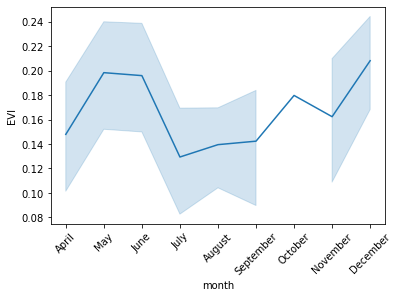

In [30]:
import seaborn as sns

sns.lineplot(x='month',y='EVI',data=filtered_df, sort=False)
plt.xticks(rotation=45)

In [31]:
data['month'] = data.index.month_name()
data['hour']=data.fecha.dt.hour

In [32]:
data.head()

,Unnamed: 0,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,...,three,Rc,Gs,hour,month,date_check_x,EVI,date_check_y,Lai,dif
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-04,0,2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,...,2.630086,-94.740468,0.000968,15,April,NaT,0.327,1 days,1.3378,9.54
2018-04-04,1,2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,...,2.652400,-95.305520,0.000931,15,April,0 days,0.327,1 days,1.3378,9.54
2018-04-04,2,2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,...,2.670949,-98.177885,0.000885,15,April,0 days,0.327,1 days,1.3378,9.54
2018-04-04,3,2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,...,2.653373,-97.623649,0.001183,15,April,0 days,0.327,1 days,1.3378,9.54
2018-04-04,4,2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,...,2.663126,-99.082702,0.001158,16,April,0 days,0.327,1 days,1.3378,9.54


In [33]:
data[['Gs','TA1','U','Rnl','EVI','Lai','dif','HR1','Ts[degC]       ']].describe()

,Gs,TA1,U,Rnl,EVI,Lai,dif,HR1,Ts[degC]
count,16189.000000,16189.000000,16189.000000,1.618900e+04,16182.000000,16182.000000,16182.000000,16189.000000,16189.000000
mean,0.001147,13.080544,4.072340,9.376624e+05,0.167507,0.693080,8.628243,73.487252,12.521277
std,0.197169,5.545479,2.166009,3.294235e+06,0.112762,0.251515,8.562900,16.018169,5.526452
min,-2.409477,-1.500000,0.000000,-1.060191e+05,-0.448000,0.100000,-19.960091,19.370000,-2.060996
25%,-0.003298,9.440000,2.351000,-8.985780e+03,0.135000,0.497673,4.064896,63.280000,8.869941
50%,0.000216,12.520000,3.793000,-9.777698e+02,0.192000,0.603700,8.595665,77.080000,12.001952
75%,0.000985,16.470000,5.479000,3.217683e+05,0.235000,0.858500,12.860000,86.800000,15.947552
max,19.018847,32.900000,18.640000,3.942829e+07,0.402000,1.337800,32.275654,95.900000,43.202286


In [34]:
#sns.pairplot(data[['Gc','TA1','U','Rnl','EVI','Lai','LST_Day_1km','HR1','Ts[degC]       ']])

In [35]:
data['Gc']=(data.Gs)

In [36]:
data.Gc.loc[data.Gc==0].value_counts()

-0.0    173
Name: Gc, dtype: int64

In [37]:
data.shape

(16189, 62)

<AxesSubplot:xlabel='hour', ylabel='Gc'>

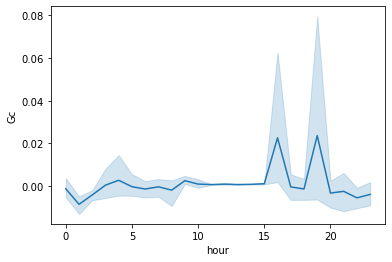

In [38]:
sns.lineplot(x='hour',y='Gc',data=data, sort=True)

In [39]:
data.columns

Index(['Unnamed: 0', 'fecha', 'index', 'Dia juliano_x', 'U', 'TA1', 'HR1',
       'TA3', 'HR3', 'TA4', 'HR4', 'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0',
       'Tmin', 'Tmax', 'Rnl', 'u[m/s]         ', 'Ts[degC]       ',
       'a[g/m3]        ', 'p_ref[hPa]     ', 'Var[u]         ',
       'Var[Ts]        ', 'Var[a]         ', 'dir[deg]       ',
       'ustar[m/s]     ', 'HTs[W/m2]      ', 'LvE[W/m2]      ',
       'z/L            ', 'z/L-virt       ', 'Flag(ustar)    ',
       'Flag(HTs)      ', 'Flag(LvE)      ', ' r_err_ustar[%]',
       '   r_err_HTs[%]', '   r_err_LvE[%]', 'Dia juliano_y', 'T_min', 'T_max',
       'es', 'Delta', 'e', 'epsilon', 'Rho_air', 'A', 'one', 'Ga_ustar', 'two',
       'three', 'Rc', 'Gs', 'hour', 'month', 'date_check_x', 'EVI',
       'date_check_y', 'Lai', 'dif', 'Gc'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

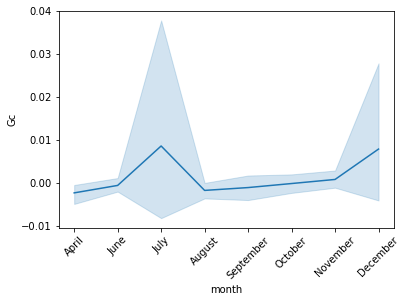

In [40]:
sns.lineplot(x='month',y='Gc',data=data, sort=False)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

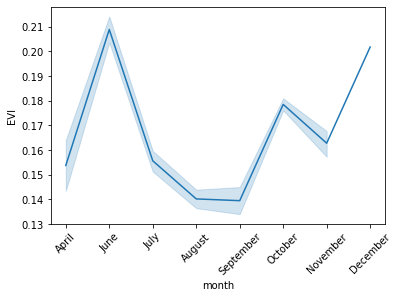

In [41]:
sns.lineplot(x='month',y='EVI',data=data, sort=False)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

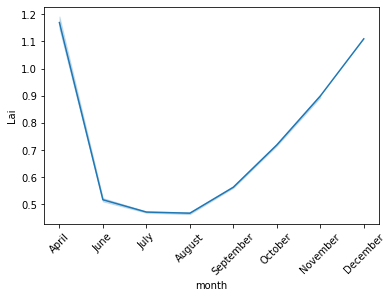

In [42]:
sns.lineplot(x='month',y='Lai',data=data, sort=False)
plt.xticks(rotation=45)

(0.0, 15.0)

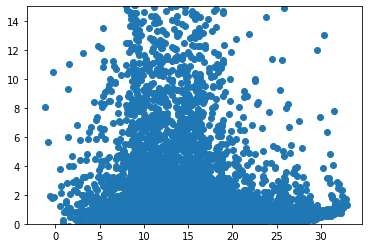

In [43]:
plt.scatter(data.TA1,data.Gc*1000)
plt.ylim(0,15)
#plt.xlim(0,200)

(0.0, 15.0)

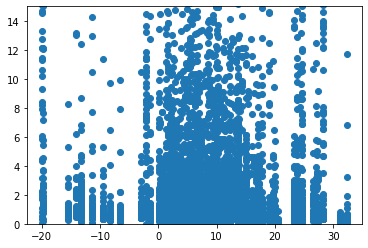

In [44]:
plt.scatter(data.dif,data.Gc*1000)
plt.ylim(0,15)

(0.0, 200.0)

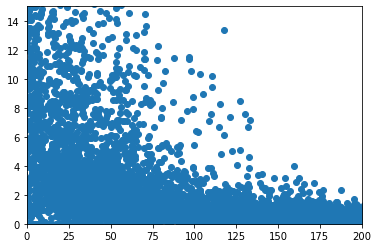

In [45]:
plt.scatter(data['LvE[W/m2]      '],data.Gc*1000)
plt.ylim(0,15)
plt.xlim(0,200)

(0.0, 1.0)

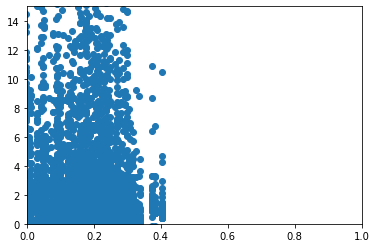

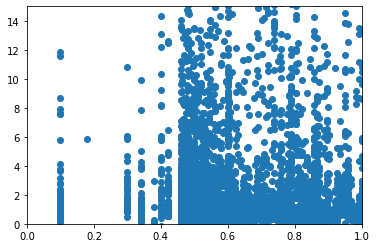

In [46]:
plt.scatter(data.EVI,data.Gc*1000)
plt.ylim(0, 15)
plt.xlim(0,1)

plt.figure()
plt.scatter(data.Lai,data.Gc*1000)
plt.ylim(0, 15)
plt.xlim(0,1)

In [47]:
df=data.loc[data.hour>9]
df=df.loc[df.hour< 16]

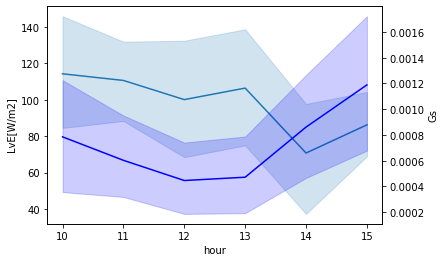

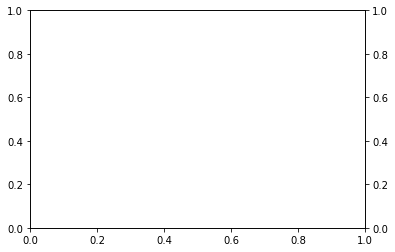

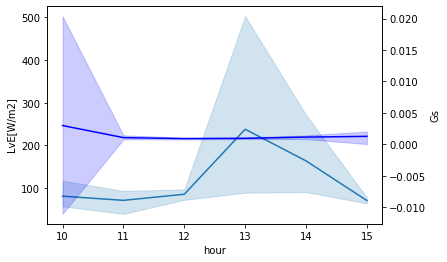

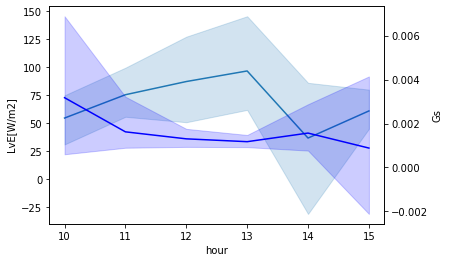

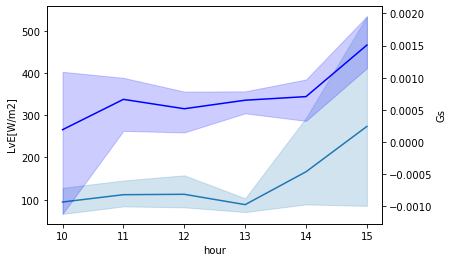

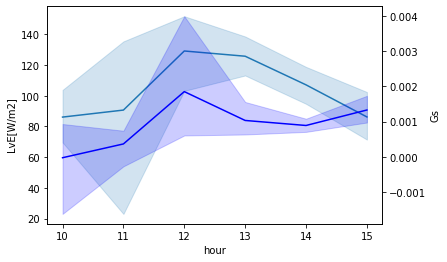

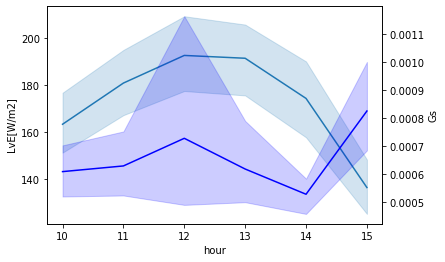

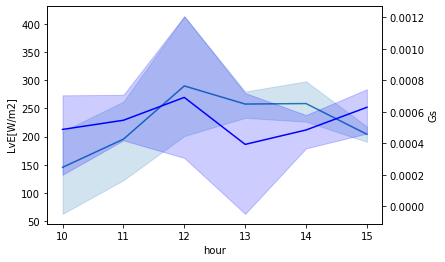

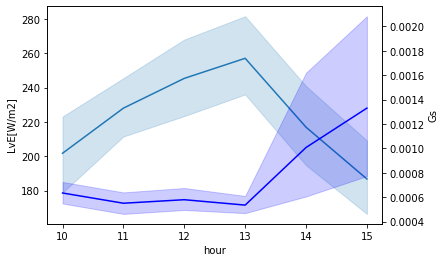

In [48]:
for i in range(4,13):
    sns.lineplot(x='hour',y='LvE[W/m2]      ',data=df.loc[df.fecha.dt.month==i])
    ax2 = plt.twinx()
    sns.lineplot(x='hour',y='Gs',data=df.loc[df.fecha.dt.month==i], color="b", ax=ax2)
    plt.show()

In [49]:
df.rename(columns={'LvE[W/m2]      ': 'LE'}, inplace=True)

In [50]:
look_back = 5*7 # usamos x anios de datos para predecir el valor siguiente
N = df.shape[0]
X = np.zeros((N - look_back - 1,look_back))
X_LAI = np.zeros(N - look_back - 1)
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape,X_LAI.shape)

(4377, 35) (4377,) (4377,)


In [51]:
for i in range(X.shape[0]):
    X[i,:] = df.Gc.values[i:i+look_back].ravel()
    X_LAI[i] = df.Lai.values[i+look_back]
    y[i] = df.Gc.values[i+look_back]

In [52]:
print(X.shape, y.shape,X_LAI.shape)

(4377, 35) (4377,) (4377,)


In [53]:
X=np.c_[ X, X_LAI ]  
X.shape

(4377, 36)

In [54]:
X

array([[9.68373226e-04, 9.30723688e-04, 8.85282350e-04, ...,
        1.83203152e-03, 2.09863618e-03, 1.33780000e+00],
       [9.30723688e-04, 8.85282350e-04, 1.18349784e-03, ...,
        2.09863618e-03, 2.15700120e-03, 1.33780000e+00],
       [8.85282350e-04, 1.18349784e-03, 6.83685479e-04, ...,
        2.15700120e-03, 1.62377102e-03, 1.33780000e+00],
       ...,
       [2.16069648e-04, 3.79808245e-04, 3.71957122e-04, ...,
        9.72623173e-04, 1.96423665e-03, 1.20354849e+00],
       [3.79808245e-04, 3.71957122e-04, 4.47554779e-04, ...,
        1.96423665e-03, 2.71010096e-03, 1.20354849e+00],
       [3.71957122e-04, 4.47554779e-04, 3.87042654e-04, ...,
        2.71010096e-03, 5.07960649e-03, 1.20354849e+00]])

In [55]:
N_train = round(4376*0.8 - look_back)
N_train
N_test = X.shape[0]-N_train
N_test

911

In [56]:
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(3466, 36) (3466,)
(911, 36) (911,)


In [57]:
data.dropna(inplace=True)

In [58]:
X = df[['TA1','EVI','U','Rnl','Lai','dif','HR1','Ts[degC]       ']]
y = df.LE.values.reshape(-1,1)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-61-ea2c99e4aedb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [62]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 74.30058369802941
Mean Squared Error: 174046.66020126644
Root Mean Squared Error: 417.188998178603


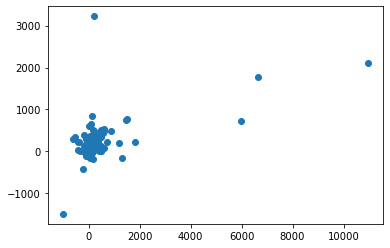

In [63]:
plt.scatter(y_test,y_pred)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

(0.0, 800.0)

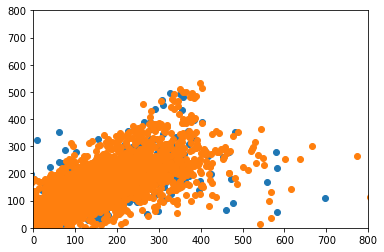

In [66]:
plt.scatter(y_test,y_pred)
plt.scatter(y_train, regressor.predict(X_train))

plt.ylim(0,800)
plt.xlim(0,800)

In [67]:
df.columns

Index(['Unnamed: 0', 'fecha', 'index', 'Dia juliano_x', 'U', 'TA1', 'HR1',
       'TA3', 'HR3', 'TA4', 'HR4', 'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0',
       'Tmin', 'Tmax', 'Rnl', 'u[m/s]         ', 'Ts[degC]       ',
       'a[g/m3]        ', 'p_ref[hPa]     ', 'Var[u]         ',
       'Var[Ts]        ', 'Var[a]         ', 'dir[deg]       ',
       'ustar[m/s]     ', 'HTs[W/m2]      ', 'LE', 'z/L            ',
       'z/L-virt       ', 'Flag(ustar)    ', 'Flag(HTs)      ',
       'Flag(LvE)      ', ' r_err_ustar[%]', '   r_err_HTs[%]',
       '   r_err_LvE[%]', 'Dia juliano_y', 'T_min', 'T_max', 'es', 'Delta',
       'e', 'epsilon', 'Rho_air', 'A', 'one', 'Ga_ustar', 'two', 'three', 'Rc',
       'Gs', 'hour', 'month', 'date_check_x', 'EVI', 'date_check_y', 'Lai',
       'dif', 'Gc'],
      dtype='object')

In [68]:
data_test = df[['LE','dif','Rnc','TA1','Ga_ustar','EVI','U','Rnl','Lai','HR1','Ts[degC]       ']].loc[df.LE>0]
data_test = data_test.loc[data_test.LE<1000]


In [69]:
data_test = df[['Gc','dif','Rnc','TA1','Ga_ustar','EVI','U','Rnl','Lai','HR1','Ts[degC]       ']].loc[df.Gc>0]
data_test = data_test.loc[data_test.Gc<0.0014]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_test, data_test.Gc, test_size=0.2, random_state=0)

In [71]:
from pycaret.regression import *
exp_reg101 = setup(data = X_train, target = 'Gc', session_id=123)

,Description,Value
0,session_id,123
1,Target,Gc
2,Original Data,"(2945, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2061, 10)"


In [72]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0001,0.0000,0.0001,0.7647,0.0001,0.2176,0.0260
et,Extra Trees Regressor,0.0001,0.0000,0.0002,0.7530,0.0002,0.2397,0.0660
rf,Random Forest Regressor,0.0001,0.0000,0.0002,0.7400,0.0002,0.2445,0.1220
gbr,Gradient Boosting Regressor,0.0001,0.0000,0.0002,0.7113,0.0002,0.2880,0.0670
dt,Decision Tree Regressor,0.0001,0.0000,0.0002,0.4989,0.0002,0.2835,0.0050
ridge,Ridge Regression,0.0002,0.0000,0.0002,0.4694,0.0002,0.7502,0.0040
br,Bayesian Ridge,0.0002,0.0000,0.0002,0.4690,0.0002,0.7564,0.0040
ada,AdaBoost Regressor,0.0002,0.0000,0.0002,0.4620,0.0002,0.5774,0.0280
lar,Least Angle Regression,0.0002,0.0000,0.0002,0.4603,0.0002,0.7506,0.0030
lr,Linear Regression,0.0002,0.0000,0.0003,0.2814,0.0003,1.0202,0.1620


In [73]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0001,0.0000,0.0002,0.7623,0.0002,0.2489
1,0.0001,0.0000,0.0002,0.7668,0.0002,0.2110
2,0.0001,0.0000,0.0001,0.7998,0.0001,0.2078
3,0.0001,0.0000,0.0001,0.7731,0.0001,0.1841
4,0.0001,0.0000,0.0001,0.7905,0.0001,0.2853
5,0.0001,0.0000,0.0001,0.8126,0.0001,0.1709
6,0.0001,0.0000,0.0002,0.7042,0.0002,0.2971
7,0.0001,0.0000,0.0002,0.7075,0.0002,0.2017
8,0.0001,0.0000,0.0001,0.7736,0.0001,0.1810
9,0.0001,0.0000,0.0001,0.7565,0.0001,0.1885


In [74]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [75]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0001,0.0000,0.0002,0.7418,0.0002,0.2570
1,0.0001,0.0000,0.0002,0.7653,0.0002,0.2141
2,0.0001,0.0000,0.0001,0.8038,0.0001,0.2146
3,0.0001,0.0000,0.0002,0.7548,0.0002,0.1801
4,0.0001,0.0000,0.0001,0.7783,0.0001,0.2374
5,0.0001,0.0000,0.0001,0.8112,0.0001,0.1624
6,0.0001,0.0000,0.0002,0.6911,0.0002,0.3168
7,0.0001,0.0000,0.0002,0.7072,0.0002,0.2020
8,0.0001,0.0000,0.0001,0.7748,0.0001,0.1782
9,0.0001,0.0000,0.0001,0.7640,0.0001,0.1900


In [76]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [77]:
#plot_model(tuned_lightgbm, plot = 'error')

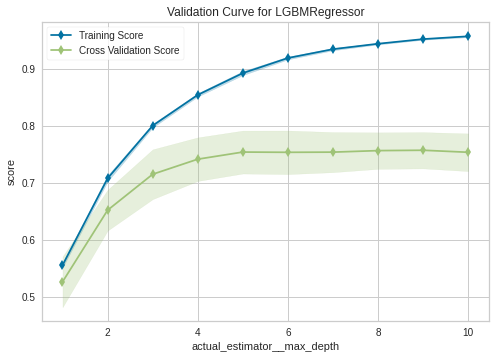

In [78]:
plot_model(tuned_lightgbm, plot='vc')

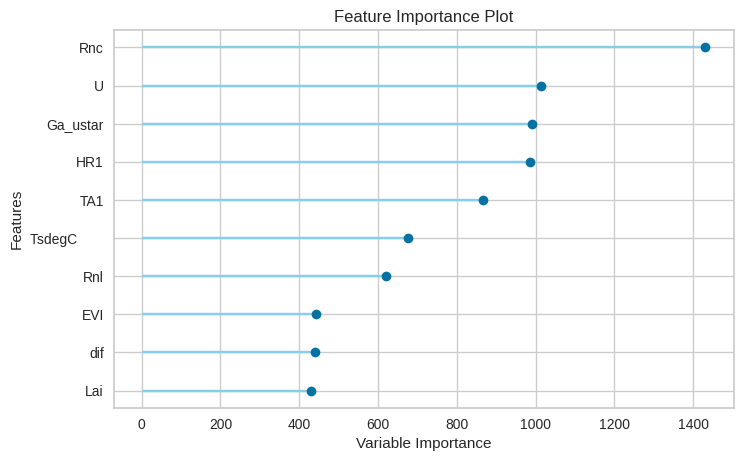

In [79]:
plot_model(tuned_lightgbm, plot='feature')

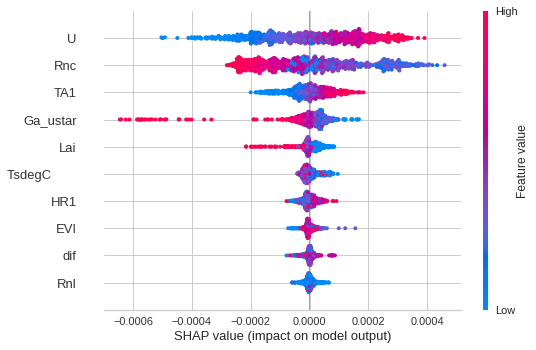

In [80]:
interpret_model(tuned_lightgbm)

In [81]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [82]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0000,0.0000,0.0000,0.9820,0.0000,0.1137


In [83]:
new_prediction = predict_model(final_lightgbm, data=X_train)
new_prediction.head()

,Gc,dif,Rnc,TA1,Ga_ustar,EVI,U,Rnl,Lai,HR1,Ts[degC],Label
Date,,,,,,,,,,,,
2018-09-29,0.000947,0.238109,90.321,16.08,0.026118,-0.064,1.870,267348.194875,0.611079,91.80,16.251089,0.000799
2018-10-10,0.000519,12.343900,541.387,14.33,0.045196,0.157,6.854,768363.066612,0.664513,33.74,13.505886,0.000573
2018-09-23,0.000279,9.701589,310.695,15.99,0.029605,0.118,2.223,459471.196749,0.585335,62.01,14.632253,0.000320
2018-06-15,0.000966,4.480000,186.109,10.19,0.009220,0.243,2.671,49250.970206,0.509733,60.21,9.381940,0.001011
2018-07-27,0.000889,7.421065,330.561,13.55,0.064492,0.167,5.726,273159.409652,0.460253,70.02,13.135304,0.000889


In [84]:
from pycaret.utils import check_metric
check_metric(new_prediction.Gc, new_prediction.Label, 'RMSE')

0.0

Text(0, 0.5, 'Gs observado')

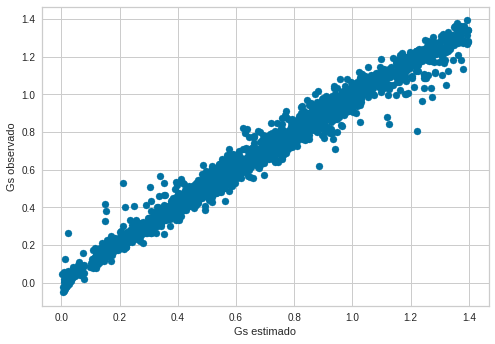

In [85]:
plt.scatter(new_prediction.Gc*1000, new_prediction.Label*1000)
plt.xlabel("Gs estimado")
plt.ylabel("Gs observado")

In [86]:
new_prediction1 = predict_model(final_lightgbm, data=X_test)
new_prediction1.head()

,Gc,dif,Rnc,TA1,Ga_ustar,EVI,U,Rnl,Lai,HR1,Ts[degC],Label
Date,,,,,,,,,,,,
2018-07-04,0.000467,4.650497,127.20400,5.489,0.035549,0.207,2.012,1.393902e+04,0.500000,78.11,5.727192,0.000540
2018-11-05,0.000445,24.426778,650.65000,19.670,0.057084,-0.026,5.828,8.475524e+06,1.000000,66.90,18.925602,0.000556
2018-10-12,0.000239,-6.563750,304.99700,13.760,0.059299,0.155,2.182,3.575599e+05,0.820700,56.64,12.973526,0.000243
2018-09-06,0.000702,15.018786,328.09700,15.440,0.050282,0.193,4.759,1.322680e+06,0.579300,51.47,14.718237,0.000639
2018-12-16,0.000941,13.740000,0.01617,30.230,0.066869,0.248,8.230,-1.016881e+05,1.164243,30.02,29.739588,0.001067


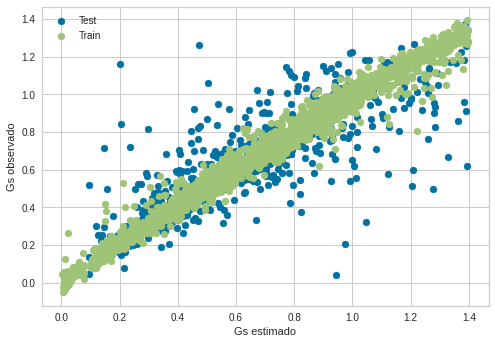

In [87]:
plt.scatter(new_prediction1.Gc*1000, new_prediction1.Label*1000,label="Test")
plt.scatter(new_prediction.Gc*1000, new_prediction.Label*1000,label="Train")
plt.xlabel("Gs estimado")
plt.ylabel("Gs observado")
plt.legend(loc='upper left')
plt.show()

In [88]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [89]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data_test.Gc.values.reshape(-1,1)*1000)

In [90]:
# Validación cruzada para identificar kernel y bandwidth
# ==============================================================================
datos=X_train.Gc.values.reshape(-1,1)*1000
param_grid = {'kernel': ['gaussian', 'epanechnikov', 'linear'],
              'bandwidth' : np.linspace(0.001, 5, 100)
             }

grid = GridSearchCV(
        estimator  = KernelDensity(),
        param_grid = param_grid,
        n_jobs     = -1,
        cv         = 10, 
        verbose    = 0
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = datos.reshape((-1,1)))

In [91]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_kde_final = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bandwidth': 0.05149494949494949, 'kernel': 'linear'} : -52.07254292533243 None


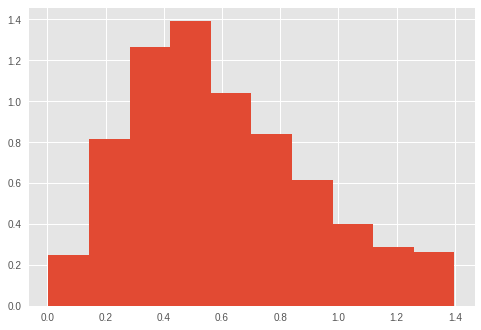

In [92]:
hist = plt.hist(data_test.Gc*1000, density=True)

In [93]:
# Predicción de densidad
# ==============================================================================
new_X = np.array([8])
log_density_pred = kde.score_samples(X=new_X.reshape(-1, 1))
#Se aplica el exponente para deshacer el logaritmo
density_pred = np.exp(log_density_pred)
density_pred

array([9.49470882e-240])

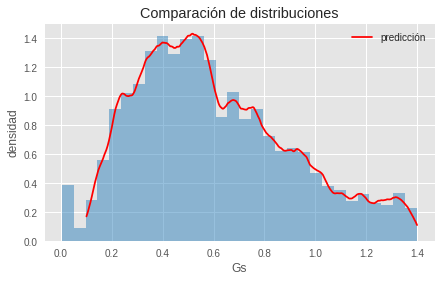

In [95]:
# Gráfico distribución de densidad estimada (predicción) vs real
# ==============================================================================
X_grid = np.linspace(0.1, 1.4, 500)
log_densidad_pred = modelo_kde_final.score_samples(X_grid.reshape(-1,1))
#Se aplica el exponente para deshacer el logaritmo
densidad_pred = np.exp(log_densidad_pred)
datos=X_train.Gc*1000
fig, ax = plt.subplots(figsize=(7,4))
ax.hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(X_grid, densidad_pred, color = 'red', label='predicción')
ax.set_title('Comparación de distribuciones')
ax.set_xlabel('Gs')
ax.set_ylabel('densidad')
ax.legend();
